In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import os
import re
import nltk
import string
import unicodedata
import pandas as pd

nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud

import keras
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# DATASET

## LOADING DATASET

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Capstone Project/teacher_reviews_student_performance_train.csv")
df.head()

,Sentiment,Label
0,Siswa ini menunjukkan peningkatan yang luar bi...,positif
1,Kerja kerasnya membuahkan hasil yang sangat ba...,positif
2,Ia selalu aktif bertanya di kelas dan menunjuk...,positif
3,Presentasinya sangat terstruktur dan penuh per...,positif
4,Tugas yang dikerjakan menunjukkan pemahaman ya...,positif


## DATA VISUALIZATION AND PREPROCESSING

In [4]:
df.describe()

,Sentiment,Label
count,2144,2144
unique,2122,2
top,Kamu perlu lebih banyak berlatih agar bisa men...,negatif
freq,4,1095


<Axes: xlabel='count', ylabel='Label'>

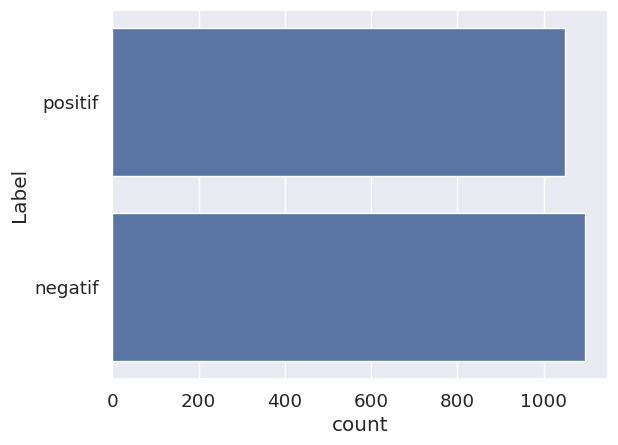

In [5]:
# to known how much "positf" and "negatif" data in dataset
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(df.Label)

In [6]:
# Checking for any missing values
df.isna().sum()

,0
Sentiment,0
Label,0


In [7]:
# change label in dataset to index "1" for "positif" and "0" for "negatif"

def label_index(label):
  if label == 'negatif':
    return 0
  elif label == 'positif':
    return 1
  else:
    return label

# Create the 'Label_index' column before applying the function
df['Label_index'] = df['Label'].apply(label_index)

df.head()

,Sentiment,Label,Label_index
0,Siswa ini menunjukkan peningkatan yang luar bi...,positif,1
1,Kerja kerasnya membuahkan hasil yang sangat ba...,positif,1
2,Ia selalu aktif bertanya di kelas dan menunjuk...,positif,1
3,Presentasinya sangat terstruktur dan penuh per...,positif,1
4,Tugas yang dikerjakan menunjukkan pemahaman ya...,positif,1


In [8]:
unicode = 1
spl = 1
punctuations = 1
lower_case = 1
stop_words = 1
lemma = 1
stemming = 0

# loading the stopwords defined in nltk library
STOPWORDS = stopwords.words('indonesian')

# initializing the nltk stemmer
ps = PorterStemmer()

# initializing the wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocessing_function(text):

    if unicode == 1:
        # résumé -> resume
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        print("Removing unaccented characters..")

    if spl == 1:
        # removing special and non alpha-numerical characters
        remove_digits = 1
        pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
        text = re.sub(pattern, '', text)
        print("Removing special and non-alpha-numerical characters..")

    if lower_case == 1:
        # converting to lower case
        text = text.lower().strip()
        print("Performing text normalization..")

    if punctuations == 1:
        # removing all punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub('[‘’“”…]', '', text)
        text = re.sub('\n', '', text)
        print("Removing all punctuations..")

    if stop_words == 1:
        # removing stop words
        text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
        print("Removing stop words..")

    if stemming == 1:
        # stemming - program, programs, programmer, programming, programmers -> program
        text = " ".join([ps.stem(word) for word in text.split()])
        print("Performing stemming..")

    if lemma == 1:
        # lemmatization - rocks -> rock, corpora -> corpus, better -> good
        text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
        print("Performing lemmatization..")

    return text

In [9]:
# column for sentiment that has been processed
df["Sentiment_proceseed"] = df["Sentiment"].map(preprocessing_function)

Output streaming akan dipotong hingga 5000 baris terakhir.
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text norma

In [10]:
# to drop duplicate data in dataset
df.drop_duplicates(inplace=True)
df

,Sentiment,Label,Label_index,Sentiment_proceseed
0,Siswa ini menunjukkan peningkatan yang luar bi...,positif,1,siswa peningkatan matematika
1,Kerja kerasnya membuahkan hasil yang sangat ba...,positif,1,kerja kerasnya membuahkan hasil ujian
2,Ia selalu aktif bertanya di kelas dan menunjuk...,positif,1,aktif kelas
3,Presentasinya sangat terstruktur dan penuh per...,positif,1,presentasinya terstruktur penuh percaya
4,Tugas yang dikerjakan menunjukkan pemahaman ya...,positif,1,tugas pemahaman mendalam materi
...,...,...,...,...
2139,"""Ia jarang memberikan perhatian penuh selama p...",negatif,0,jarang perhatian penuh prose belajar
2140,"""Ia membutuhkan motivasi tambahan untuk mening...",negatif,0,membutuhkan motivasi tambahan meningkatkan sem...
2141,"""Ia sering tidak memperhatikan masukan yang di...",negatif,0,memperhatikan masukan guru
2142,"""Ia jarang menyelesaikan tugas yang lebih mena...",negatif,0,jarang menyelesaikan tugas menantang serius


In [11]:
X = np.array(df['Sentiment_proceseed'])
Y = np.array(pd.get_dummies(df[['Label_index']]))

In [12]:
sentences = X

In [13]:
# Word-vector Size
embed_size = 50

# Unique Words
max_features = 500

# No of words per document
max_len = 350

tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(sentences))

list_tokenized_train = tokenizer.texts_to_sequences(sentences)
X = pad_sequences(list_tokenized_train, maxlen = max_len)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print('Shape of Training Data')
print(X_train.shape, Y_train.shape)

print('Shape of Testing Data')
print(X_test.shape, Y_test.shape)

Shape of Training Data
(1909, 350) (1909, 1)
Shape of Testing Data
(213, 350) (213, 1)


### Wordcloud For Positive Text

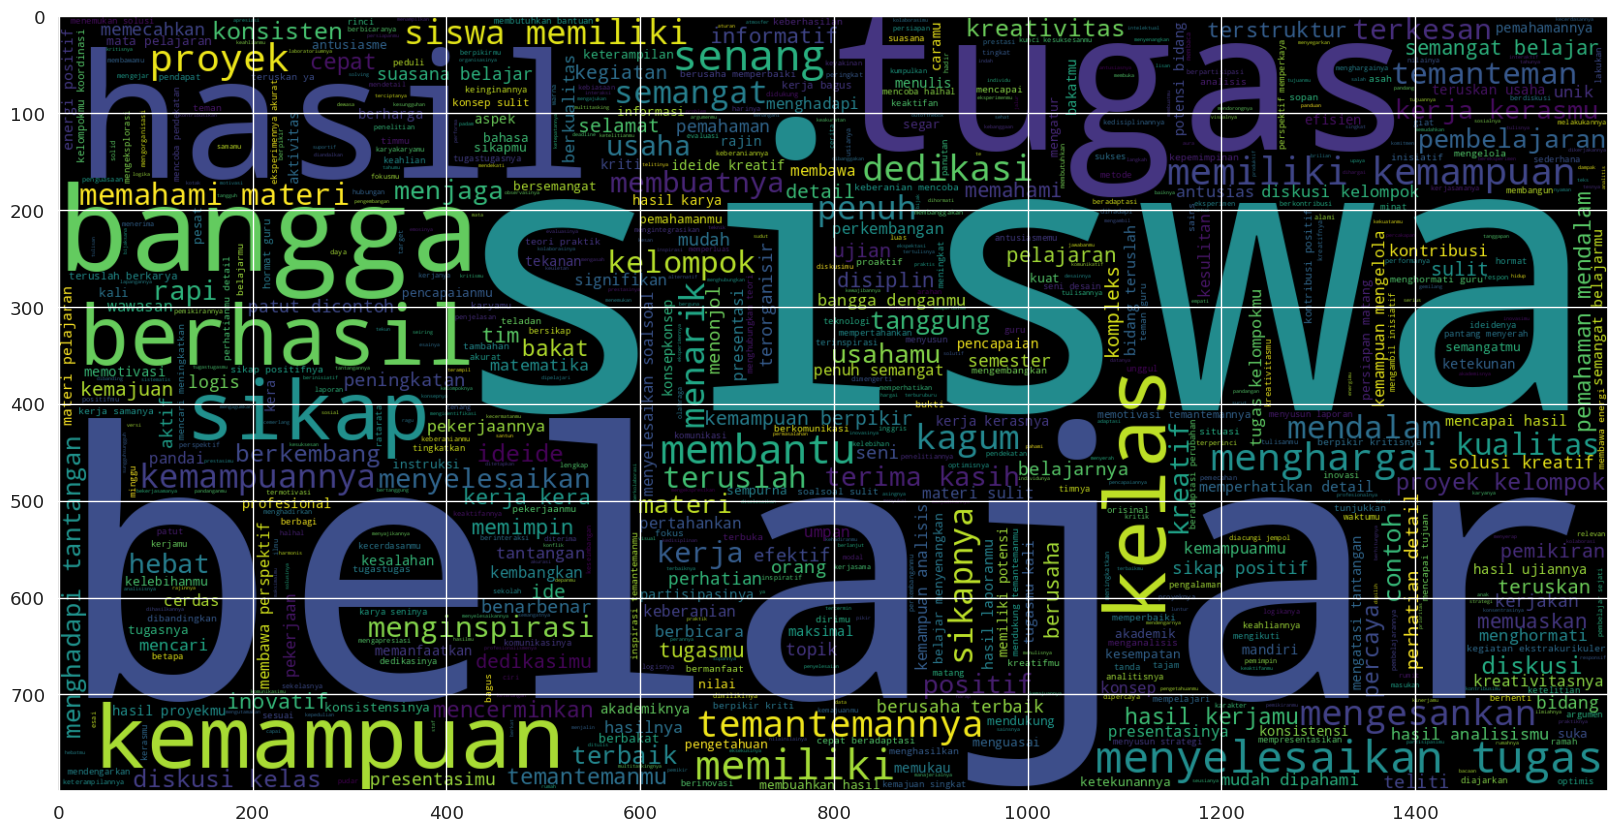

In [14]:
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Label_index == 1].Sentiment_proceseed))
plt.imshow(wc , interpolation = 'bilinear')

### Wordcloud For Negative Text

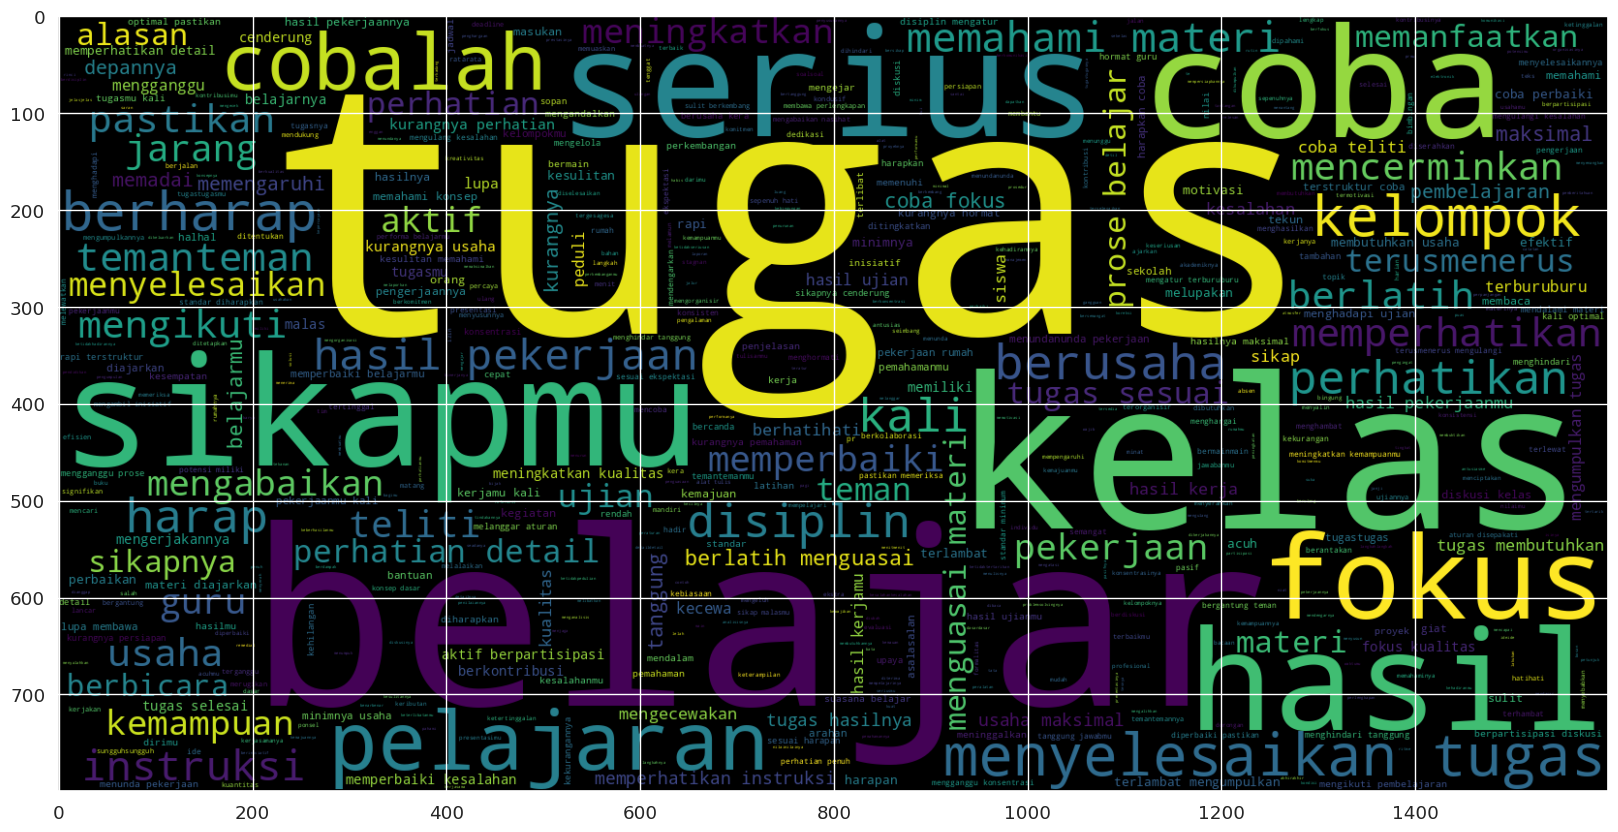

In [15]:
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Label_index == 0].Sentiment_proceseed))
plt.imshow(wc , interpolation = 'bilinear')

### Number of Characters in Text

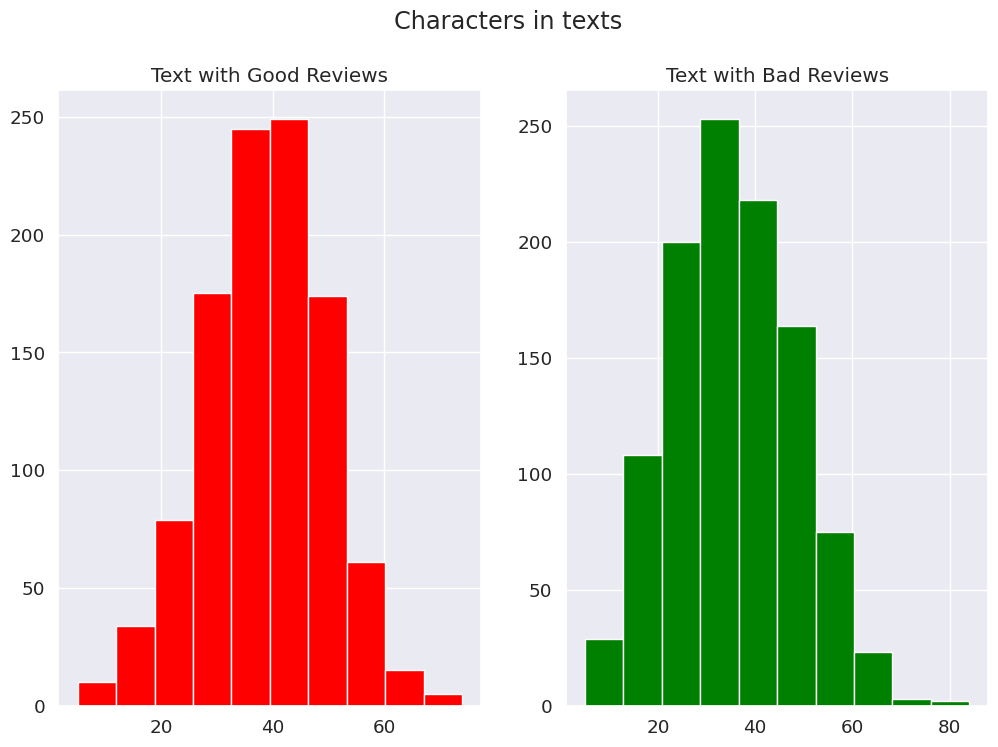

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['Label_index']==1]['Sentiment_proceseed'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Text with Good Reviews')
text_len=df[df['Label_index']==0]['Sentiment_proceseed'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Characters in texts')
plt.show()

### Number of Words in Each Text

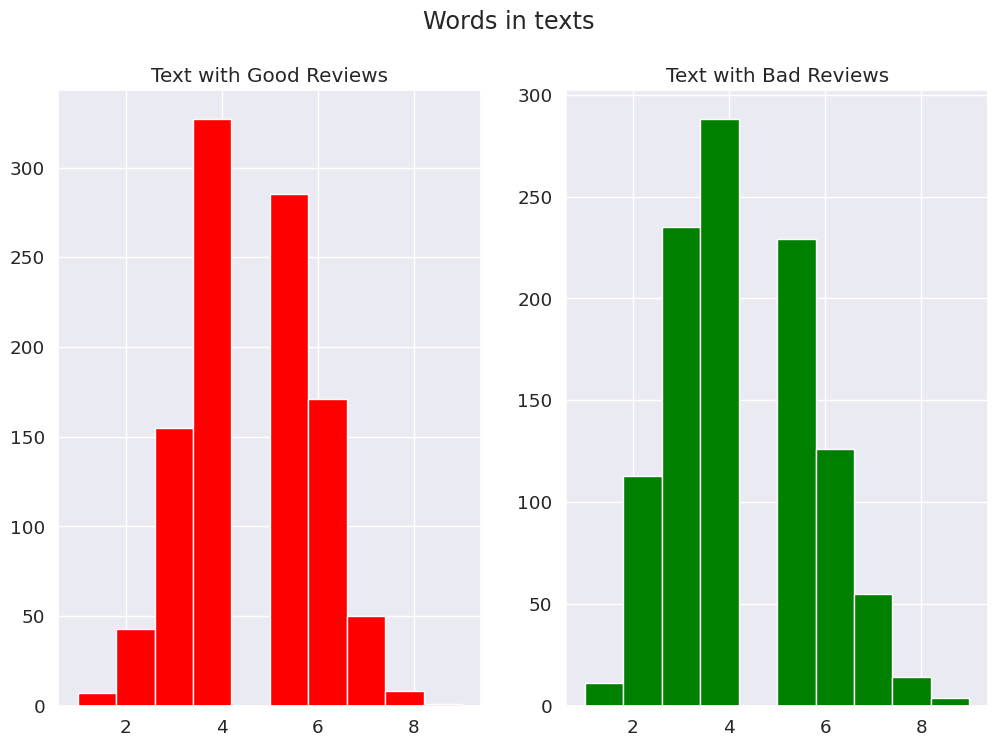

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['Label_index']==1]['Sentiment_proceseed'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Text with Good Reviews')
text_len=df[df['Label_index']==0]['Sentiment_proceseed'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Words in texts')
plt.show()

### Average Word Length in a Text

<ipython-input-18-eda0081873b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
<ipython-input-18-eda0081873b3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')


Text(0.5, 0.98, 'Average word length in each text')

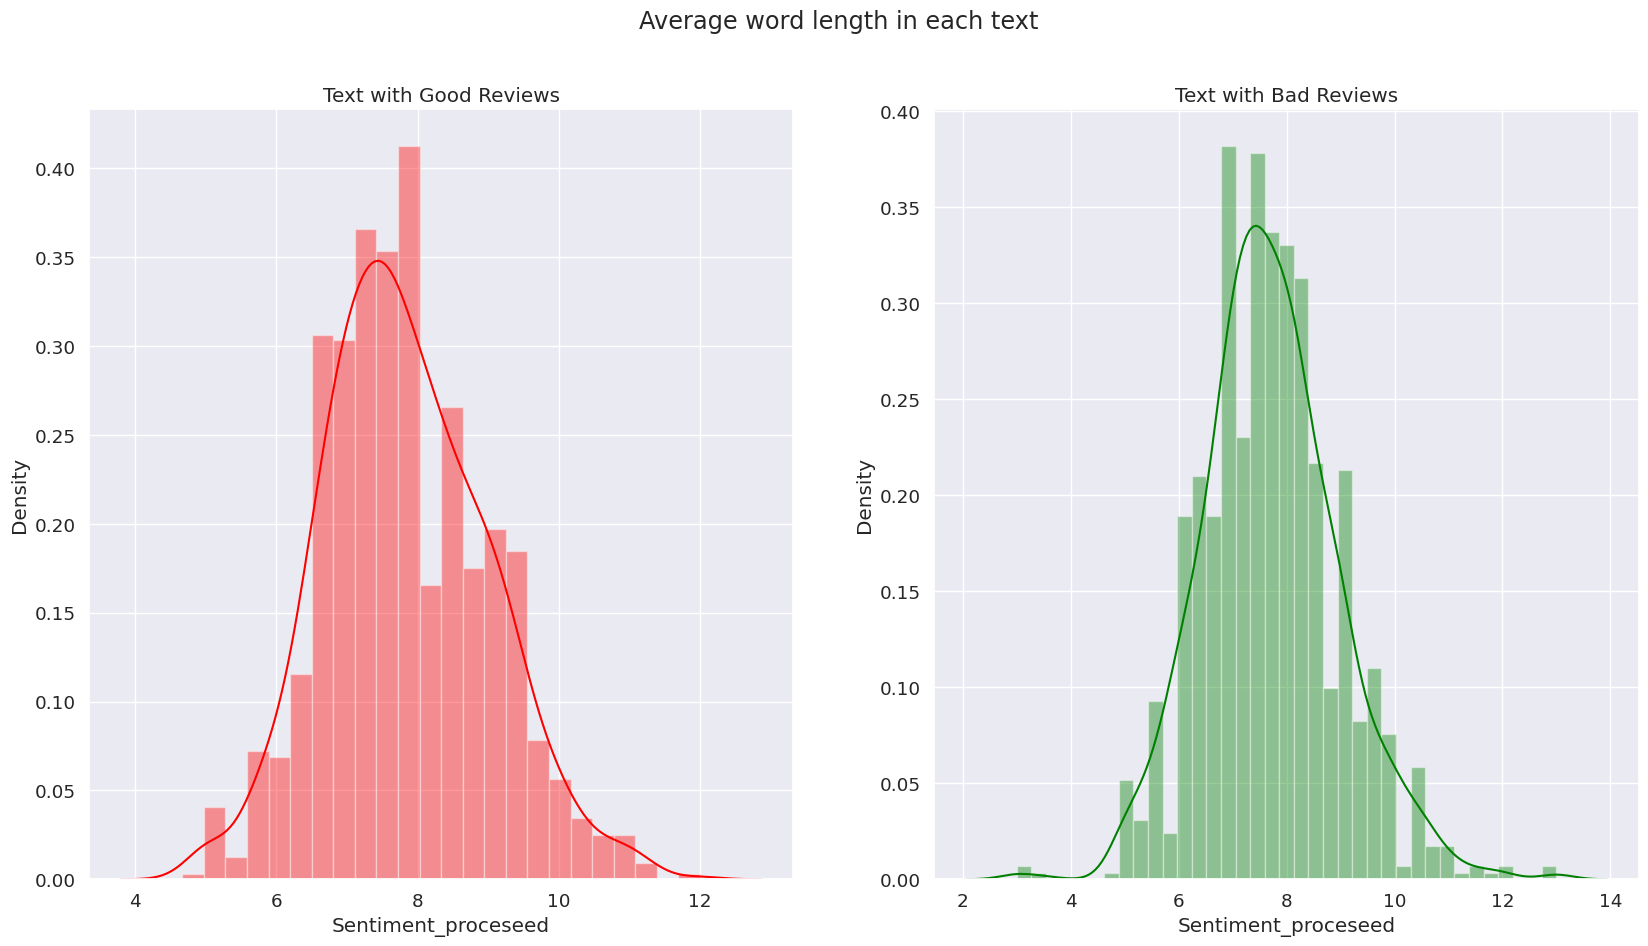

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['Label_index']==1]['Sentiment_proceseed'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Text with Good Reviews')
word=df[df['Label_index']==0]['Sentiment_proceseed'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text')

In [19]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.Sentiment_proceseed)
corpus[:5]

['siswa', 'peningkatan', 'matematika', 'kerja', 'kerasnya']

In [20]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'tugas': 517,
 'hasil': 281,
 'belajar': 249,
 'siswa': 148,
 'kelas': 146,
 'menyelesaikan': 135,
 'materi': 130,
 'kemampuan': 129,
 'coba': 115,
 'memiliki': 109}

In [21]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [22]:
most_common_uni = get_top_text_ngrams(df.Sentiment_proceseed,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [23]:
most_common_bi = get_top_text_ngrams(df.Sentiment_proceseed,20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Bigrams in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [24]:
most_common_tri = get_top_text_ngrams(df.Sentiment_proceseed,20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Trigrams in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

## Defined Embeddings

In [25]:
GLOVE_FILE = "/content/drive/MyDrive/Capstone Project/glove_50dim_wiki.id.case.text.txt"

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype = 'float32')

embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(GLOVE_FILE, encoding = 'utf-8'))

In [26]:
all_embs = np.hstack([v for v in embeddings_index.values()])
emb_mean, emb_std = all_embs.mean(), all_embs.std()

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

In [27]:
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)

    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Model

In [28]:
inp = Input(shape = (max_len,))
x = Embedding(max_features, embed_size, weights = [embedding_matrix])(inp)
x = Bidirectional(LSTM(64, return_sequences = True, recurrent_dropout = 0.4))(x)
x = GlobalMaxPool1D()(x)
x = Dense(32, activation = 'relu')(x)
x = Dropout(0.4)(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs = inp, outputs = x)

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 350)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 350, 50)             │          25,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 350, 128)            │          58,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,041 (343.91 KB)

 Trainable params: 88,041 (343.91 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
epochs = 30
batch_size = 128

checkpoint = ModelCheckpoint('Sentiment.keras', save_best_only = True, monitor = 'val_loss', mode = 'min', verbose = 1)
# early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 5, mode = 'min', verbose = 1, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 2, min_delta = 0.001, mode = 'min', verbose = 1)

history = model.fit(X_train, Y_train,
                    epochs = epochs, batch_size = batch_size,
                    validation_split = 0.35,
                    callbacks = [checkpoint])

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5202 - loss: 0.6954
Epoch 1: val_loss improved from inf to 0.68758, saving model to Sentiment.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5199 - loss: 0.6951 - val_accuracy: 0.4649 - val_loss: 0.6876
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5747 - loss: 0.6726
Epoch 2: val_loss improved from 0.68758 to 0.65880, saving model to Sentiment.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5769 - loss: 0.6722 - val_accuracy: 0.6024 - val_loss: 0.6588
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6541 - loss: 0.6409
Epoch 3: val_loss improved from 0.65880 to 0.61505, saving model to Sentiment.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6549 - loss: 0.6404 - val_accuracy: 0.7250 - val_loss: 0.6151
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7212 - loss: 0.6038
Epoch 4: val_loss improved from 0.61505 to 0.55803, saving model to Sentime

In [30]:
model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step


array([[9.35839236e-01],
       [9.99515116e-01],
       [9.99985218e-01],
       [1.26017490e-04],
       [9.96861517e-01],
       [3.60414060e-03],
       [1.05717359e-03],
       [1.09421751e-04],
       [3.98682356e-01],
       [3.01984865e-02],
       [6.55858684e-03],
       [9.95829403e-01],
       [9.99995232e-01],
       [4.12339866e-02],
       [7.75902942e-02],
       [9.95099306e-01],
       [1.49463505e-01],
       [9.97836888e-01],
       [1.59118616e-03],
       [3.35591018e-01],
       [1.55141728e-03],
       [9.98165488e-01],
       [9.76142883e-01],
       [9.99993861e-01],
       [9.99999821e-01],
       [9.99951541e-01],
       [4.12339866e-02],
       [8.22310569e-04],
       [1.06615731e-02],
       [2.71762867e-04],
       [1.43102156e-02],
       [5.09246588e-01],
       [7.51010180e-02],
       [1.30527047e-02],
       [2.25622393e-03],
       [2.08361447e-01],
       [9.57594097e-01],
       [9.99990582e-01],
       [2.16196966e-03],
       [9.98823822e-01],


In [31]:
test_df = pd.read_csv("/content/drive/MyDrive/Capstone Project/teacher_review_performance_students_test.csv")

In [32]:
test_df["processed_Sentiment"] = df["Sentiment"].map(preprocessing_function)
test_df

Output streaming akan dipotong hingga 5000 baris terakhir.
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text normalization..
Removing all punctuations..
Removing stop words..
Performing lemmatization..
Removing unaccented characters..
Removing special and non-alpha-numerical characters..
Performing text norma

,Sentiment,Label,processed_Sentiment
0,"""Siswa ini selalu menunjukkan semangat belajar...",1,siswa peningkatan matematika
1,"""Ia mampu menyelesaikan tugas dengan sangat ba...",1,kerja kerasnya membuahkan hasil ujian
2,"""Sikapnya yang aktif di kelas sangat membantu ...",1,aktif kelas
3,"""Ia memiliki kemampuan berpikir kritis yang lu...",1,presentasinya terstruktur penuh percaya
4,"""Prestasinya dalam mata pelajaran ini terus me...",1,tugas pemahaman mendalam materi
...,...,...,...
195,"""Ia sering meninggalkan tugas sekolah tanpa di...",0,mengelola menghadapi tugas
196,"""Kemampuannya memahami konsep-konsep dasar mas...",0,sikapnya menghormati guru teman membuatnya tel...
197,"""Ia menunjukkan sedikit usaha untuk memperbaik...",0,kemampuannya membaca memahami materi menonjol
198,"""Hasil ujiannya mencerminkan kurangnya fokus d...",0,memiliki belajar


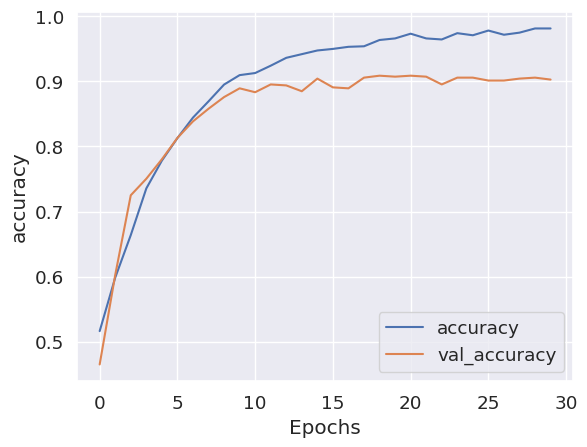

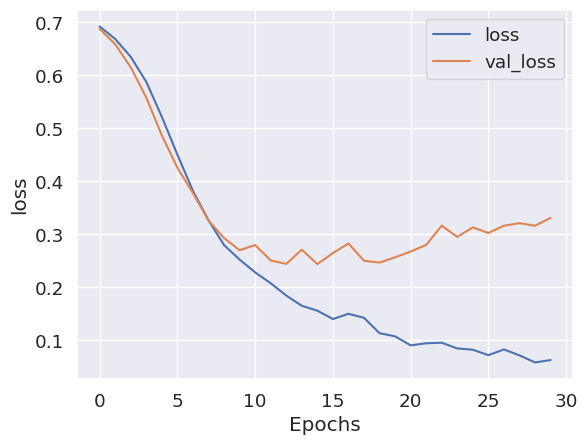

In [33]:
# Plot utility
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Prediction Model

In [34]:
# fumction to predict model that will generate ouput 1 or 0 based on model prediction
def new_predict(text):

    new_text = [text]
    seq = tokenizer.texts_to_sequences(new_text)
    padded = pad_sequences(seq, maxlen = 350)

    pred = model.predict(padded)

    if pred[0][0] > 0.5:
        return 1
    else:
        return 0

In [35]:
test_df["Label"] = test_df["processed_Sentiment"].map(new_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━

In [36]:
# for example
Sentiment = input("Contoh Komentar Guru: ")

predicted_performance = new_predict(Sentiment)
print(f"Prediksi label index dari Sentiment: {predicted_performance}")

Contoh Komentar Guru: Kemampuan membaca dan menulis dari siswa masih perlu ditingkatkan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediksi label index dari Sentiment: 0


In [37]:
# prompt: buatkan save model

model.save('teacher_sentiment_analysis_fix_model.h5')